<a href="https://colab.research.google.com/github/housekjh1/study-pandas/blob/main/%EC%83%81%EA%B0%80(%EC%83%81%EA%B6%8C)%EC%A0%95%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
!ls

'소상공인시장진흥공단_상가(상권)정보_부산_202306.csv'   sample_data


In [ ]:
# df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_부산_202306.csv", encoding="cp949") # 한글인코딩
# df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_부산_202306.csv", sep="|")
df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_부산_202306.csv", encoding="utf-8") # 코랩 버그, 강제로 utf-8로 읽기
# 파일 안읽힐 시 1. 엑셀에서 선처리하기

# 할 일
1. 데이터 불러오기
2. DF로 바꾸기
3. NA삭제 -> NA파악

In [6]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0072343,선해횟집,NaN,I2,음식,I201,한식,I20111,횟집,I56111,...,2641011100100300027023409,NaN,부산광역시 금정구 사천로3번길 2,609808,46264,NaN,1,NaN,129.113321,35.223363
1,MA010120220805430802,미즈노,NaN,G2,소매,G209,섬유·의복·신발 소매,G20905,기타 의류 소매업,G47419,...,2635010500114960000000001,롯데백화점센텀시티점,부산광역시 해운대구 센텀남대로 59,612022,48058,NaN,5,NaN,129.131099,35.169873
2,MA010120220805430814,리스트,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,2644010400134380000000001,스타필드시티명지점,부산광역시 강서구 명지국제6로 168,618200,46772,NaN,2,NaN,128.918174,35.093125
3,MA010120220805430900,눈썹그리기교실동안눈썹,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,2632010200122720005015331,현호타워,부산광역시 북구 화명대로 31,616852,46525,NaN,NaN,NaN,129.011641,35.235217
4,MA010120220805430935,카페051남포역점,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,2611013700100010005007067,NaN,부산광역시 중구 남포길 47,600042,48954,NaN,1,NaN,129.033875,35.098035


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153531 entries, 0 to 153530
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     153531 non-null  object 
 1   상호명        153530 non-null  object 
 2   지점명        1893 non-null    object 
 3   상권업종대분류코드  153531 non-null  object 
 4   상권업종대분류명   153531 non-null  object 
 5   상권업종중분류코드  153531 non-null  object 
 6   상권업종중분류명   153531 non-null  object 
 7   상권업종소분류코드  153531 non-null  object 
 8   상권업종소분류명   153531 non-null  object 
 9   표준산업분류코드   153509 non-null  object 
 10  표준산업분류명    153509 non-null  object 
 11  시도코드       153531 non-null  int64  
 12  시도명        153531 non-null  object 
 13  시군구코드      153531 non-null  int64  
 14  시군구명       153531 non-null  object 
 15  행정동코드      153531 non-null  int64  
 16  행정동명       153531 non-null  object 
 17  법정동코드      153531 non-null  int64  
 18  법정동명       153531 non-null  object 
 19  지번코드       153531 non-n

In [11]:
n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          151638
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         22
표준산업분류명          22
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             1
지번부번지         17336
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        129142
건물관리번호            3
건물명          101546
도로명주소             0
구우편번호             0
신우편번호             0
동정보          153531
층정보           73165
호정보          153531
경도                0
위도                0
dtype: int64

TypeError: ignored

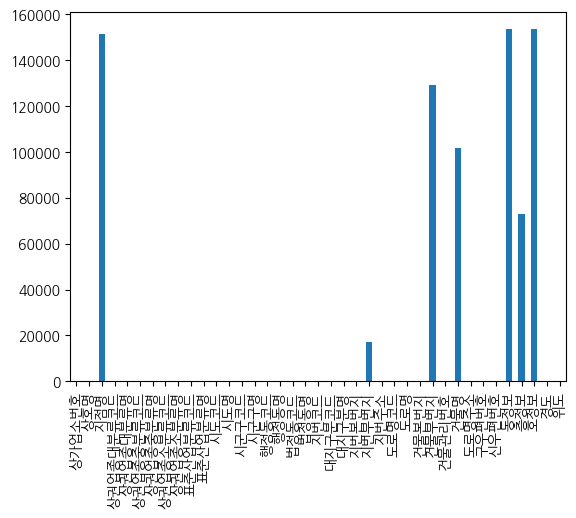

In [13]:
n.plot(kind="bar").bar() # NA가 너무 많을 때는 해당 컬럼을 날리기

In [19]:
not_use = n.sort_values(ascending=False).head(9)
not_use

호정보         153531
동정보         153531
지점명         151638
건물부번지       129142
건물명         101546
층정보          73165
지번부번지        17336
표준산업분류코드        22
표준산업분류명         22
dtype: int64

In [20]:
not_use_col = not_use.index
not_use_col

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [23]:
# df = df.drop(not_use_col, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153531 entries, 0 to 153530
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     153531 non-null  object 
 1   상호명        153530 non-null  object 
 2   상권업종대분류코드  153531 non-null  object 
 3   상권업종대분류명   153531 non-null  object 
 4   상권업종중분류코드  153531 non-null  object 
 5   상권업종중분류명   153531 non-null  object 
 6   상권업종소분류코드  153531 non-null  object 
 7   상권업종소분류명   153531 non-null  object 
 8   시도코드       153531 non-null  int64  
 9   시도명        153531 non-null  object 
 10  시군구코드      153531 non-null  int64  
 11  시군구명       153531 non-null  object 
 12  행정동코드      153531 non-null  int64  
 13  행정동명       153531 non-null  object 
 14  법정동코드      153531 non-null  int64  
 15  법정동명       153531 non-null  object 
 16  지번코드       153531 non-null  int64  
 17  대지구분코드     153531 non-null  int64  
 18  대지구분명      153531 non-null  object 
 19  지번본번지      153530 non-n

In [26]:
df.isnull().sum()

상가업소번호       0
상호명          1
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        1
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
건물관리번호       3
도로명주소        0
구우편번호        0
신우편번호        0
경도           0
위도           0
dtype: int64

In [32]:
cols = df.columns
not_use_code = cols[cols.str.contains("코드|번호")]
not_use_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [33]:
df = df.drop(not_use_code, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153531 entries, 0 to 153530
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       153530 non-null  object 
 1   상권업종대분류명  153531 non-null  object 
 2   상권업종중분류명  153531 non-null  object 
 3   상권업종소분류명  153531 non-null  object 
 4   시도명       153531 non-null  object 
 5   시군구명      153531 non-null  object 
 6   행정동명      153531 non-null  object 
 7   법정동명      153531 non-null  object 
 8   대지구분명     153531 non-null  object 
 9   지번본번지     153530 non-null  float64
 10  지번주소      153531 non-null  object 
 11  도로명       153531 non-null  object 
 12  건물본번지     153531 non-null  int64  
 13  도로명주소     153531 non-null  object 
 14  경도        153531 non-null  float64
 15  위도        153531 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 18.7+ MB
